In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoinheist/BitcoinHeistData.csv


In [2]:
df = pd.read_csv("/kaggle/input/bitcoinheist/BitcoinHeistData.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41413 entries, 0 to 41412
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    41413 non-null  object 
 1   year       41413 non-null  int64  
 2   day        41413 non-null  int64  
 3   length     41413 non-null  int64  
 4   weight     41413 non-null  float64
 5   count      41413 non-null  int64  
 6   looped     41413 non-null  int64  
 7   neighbors  41413 non-null  int64  
 8   income     41413 non-null  float64
 9   label      41413 non-null  object 
 10  cluster    41413 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 3.6+ MB
None


In [21]:
#remove the white labels
df = df[df['label'] != 'white']

In [23]:
# Drop the 'address' and 'label' columns for clustering
X = df.drop(['address','label','year'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

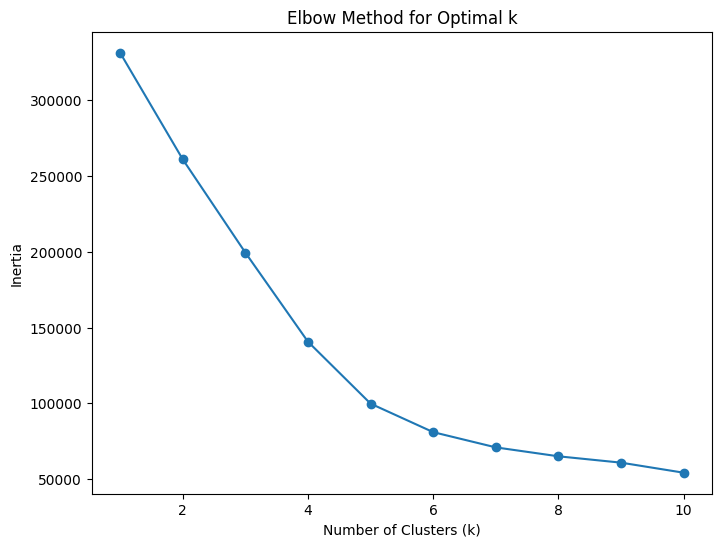

In [25]:
# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Based on the elbow method, choose an optimal k (number of clusters)
optimal_k = 6  # Adjust this based on the plot

In [27]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k,random_state = 42)
df['cluster'] = kmeans.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


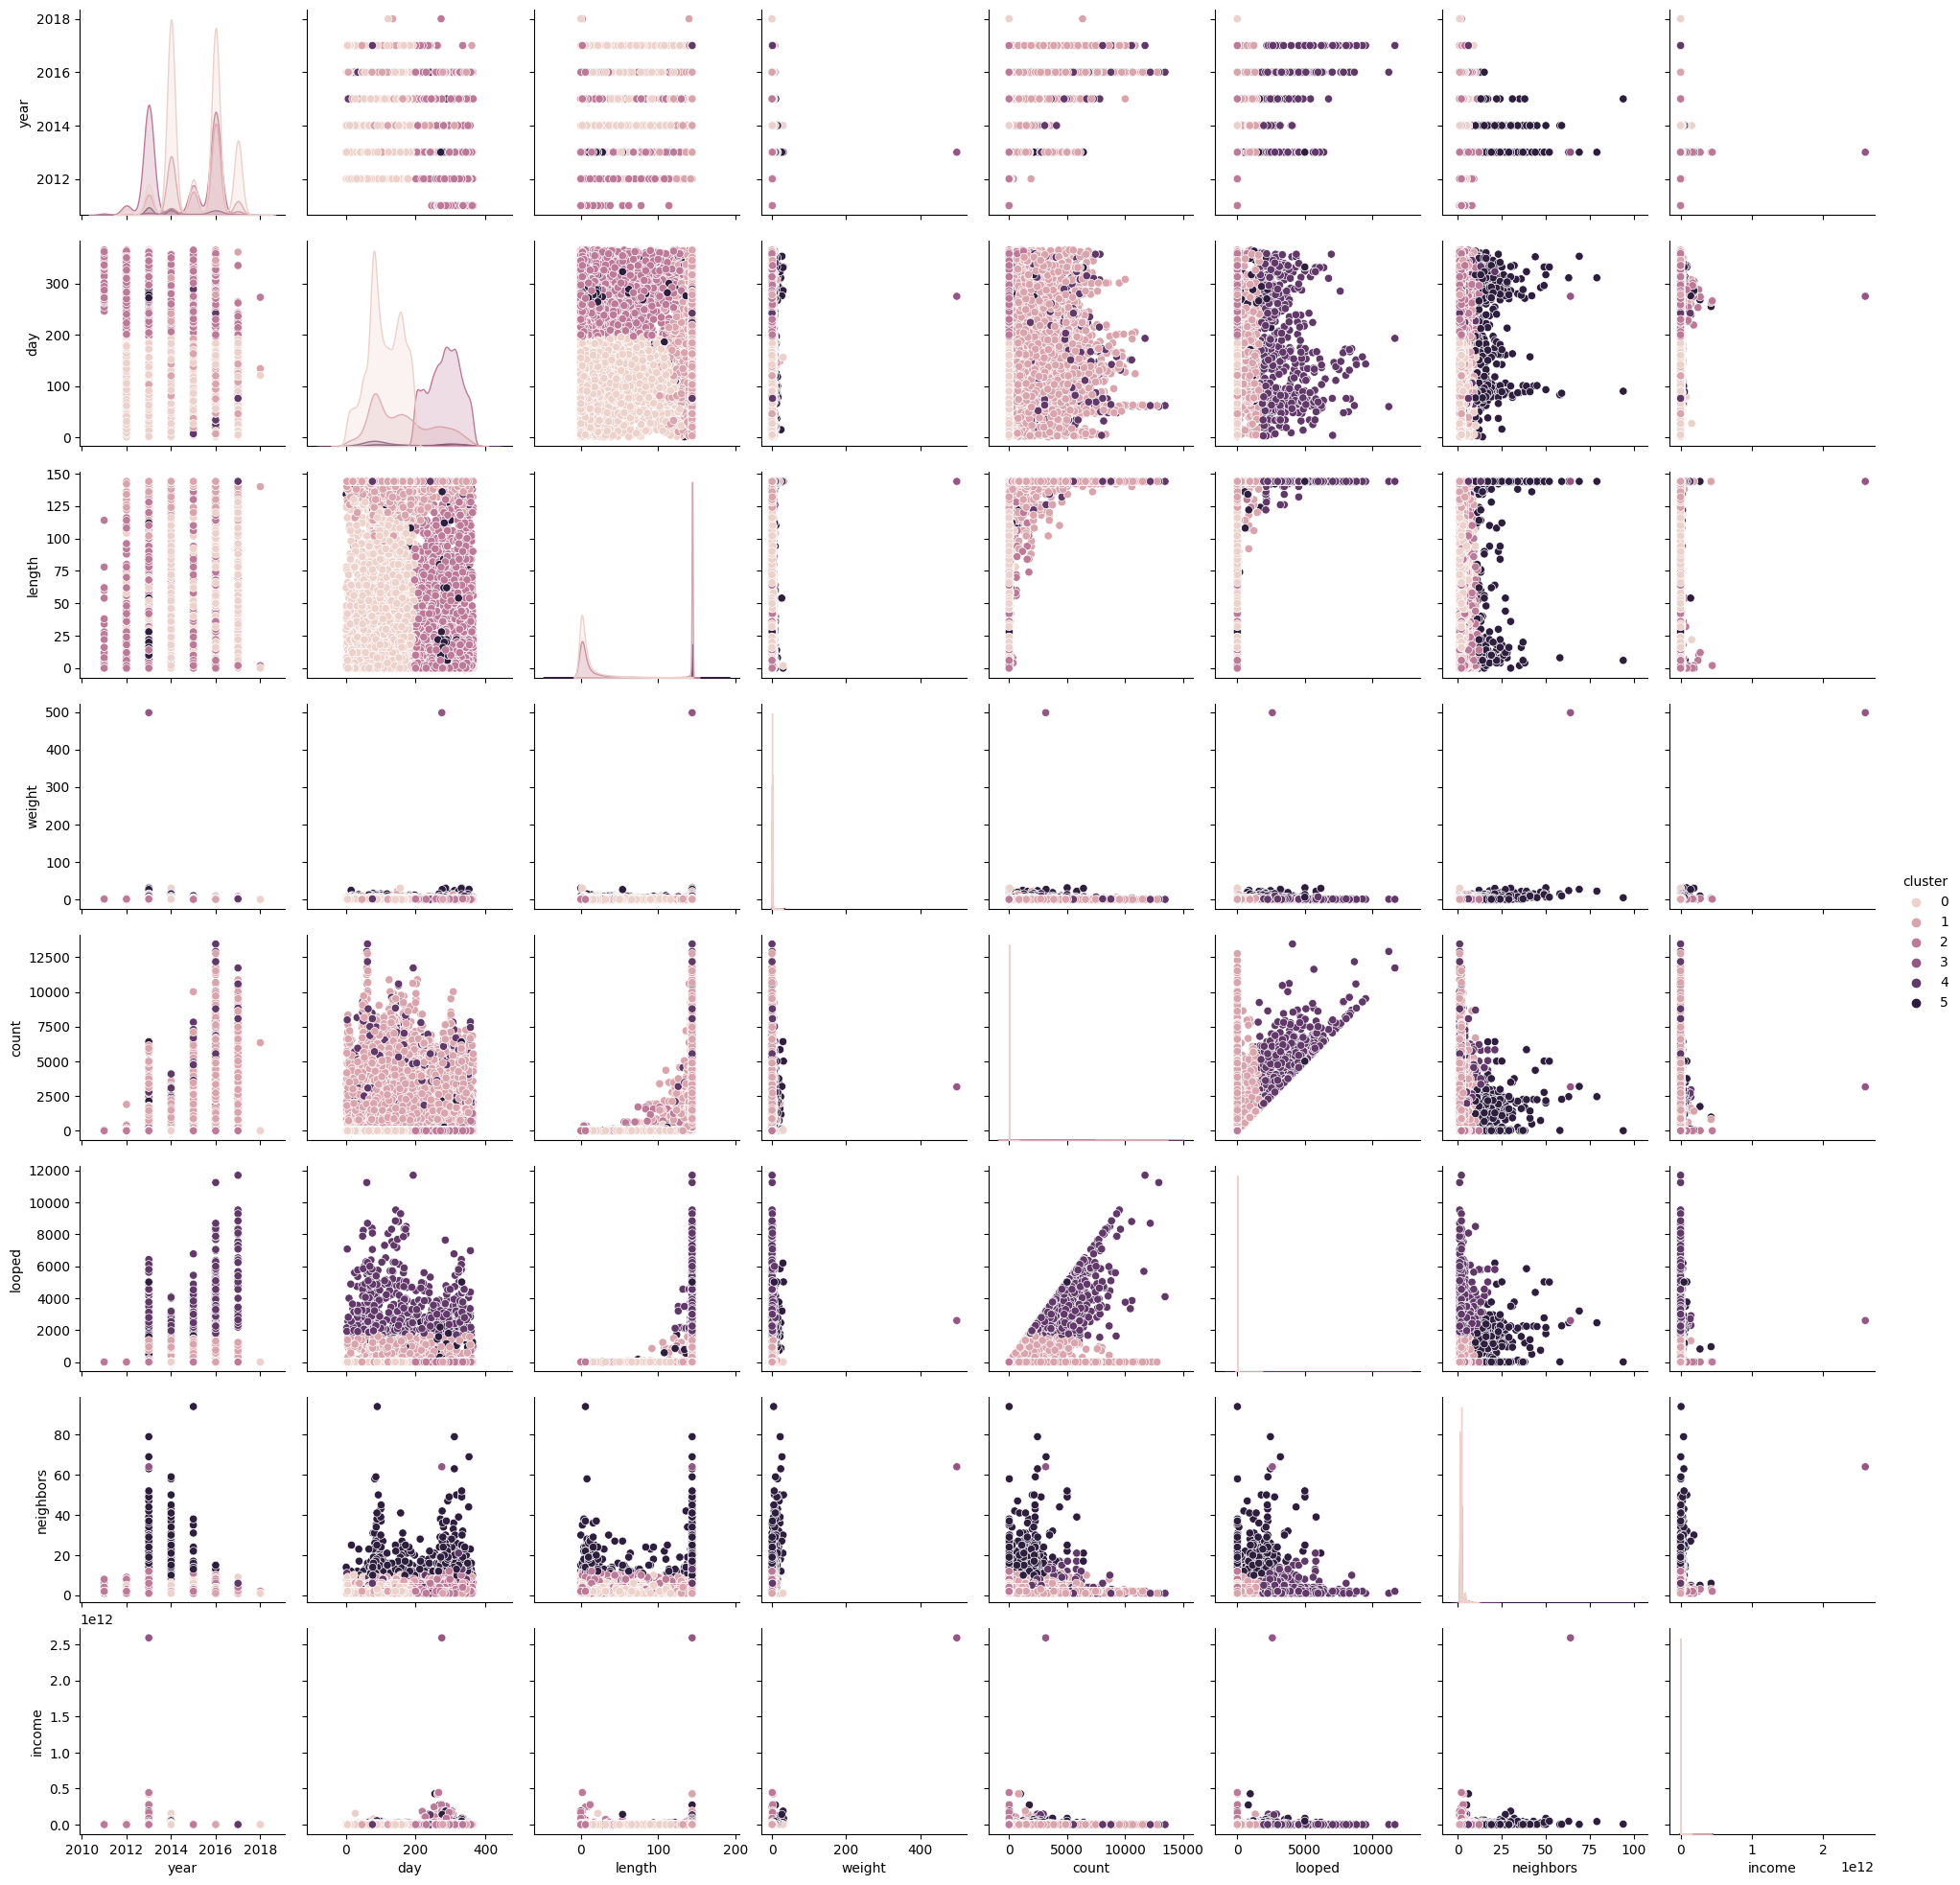

In [33]:
# Visualize the clusters
sns.pairplot(df, hue='cluster', diag_kind='kde')
plt.show()

In [28]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.5692527518757092


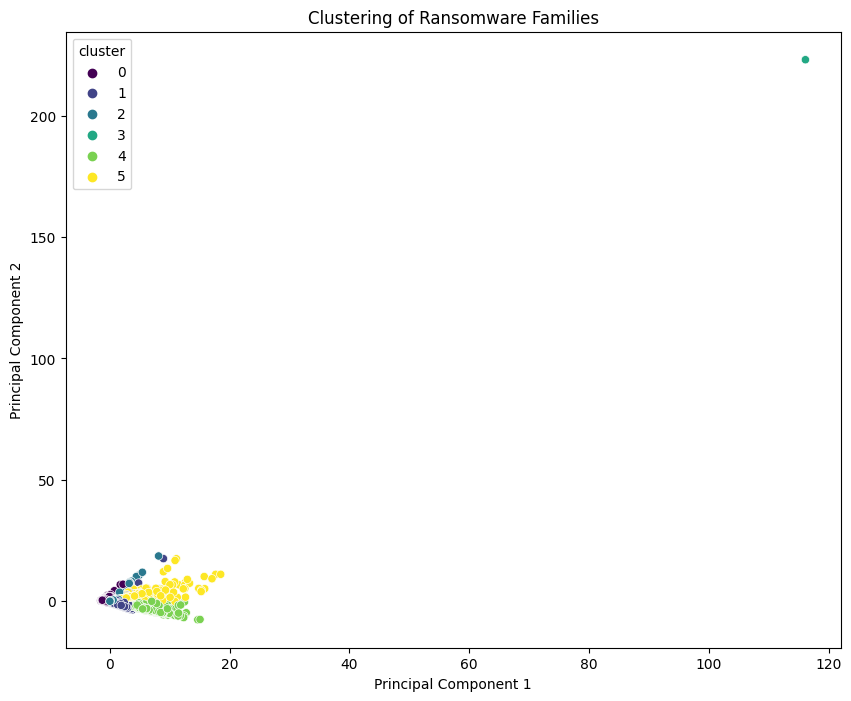

In [29]:
# Visualize the clusters in 2D using the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Clustering of Ransomware Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

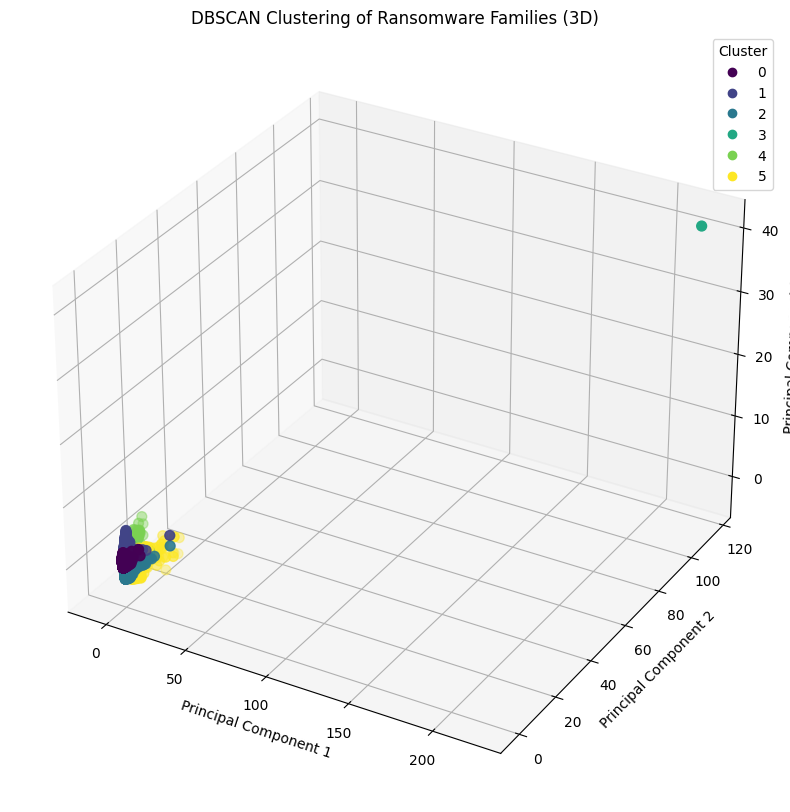

In [32]:
# Visualize the clusters in 3D using the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 1], X_pca[:, 0], X_pca[:, 2], c=df['cluster'], cmap='viridis', s=50)
ax.set_title('DBSCAN Clustering of Ransomware Families (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Determine the optimal number of clusters using the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

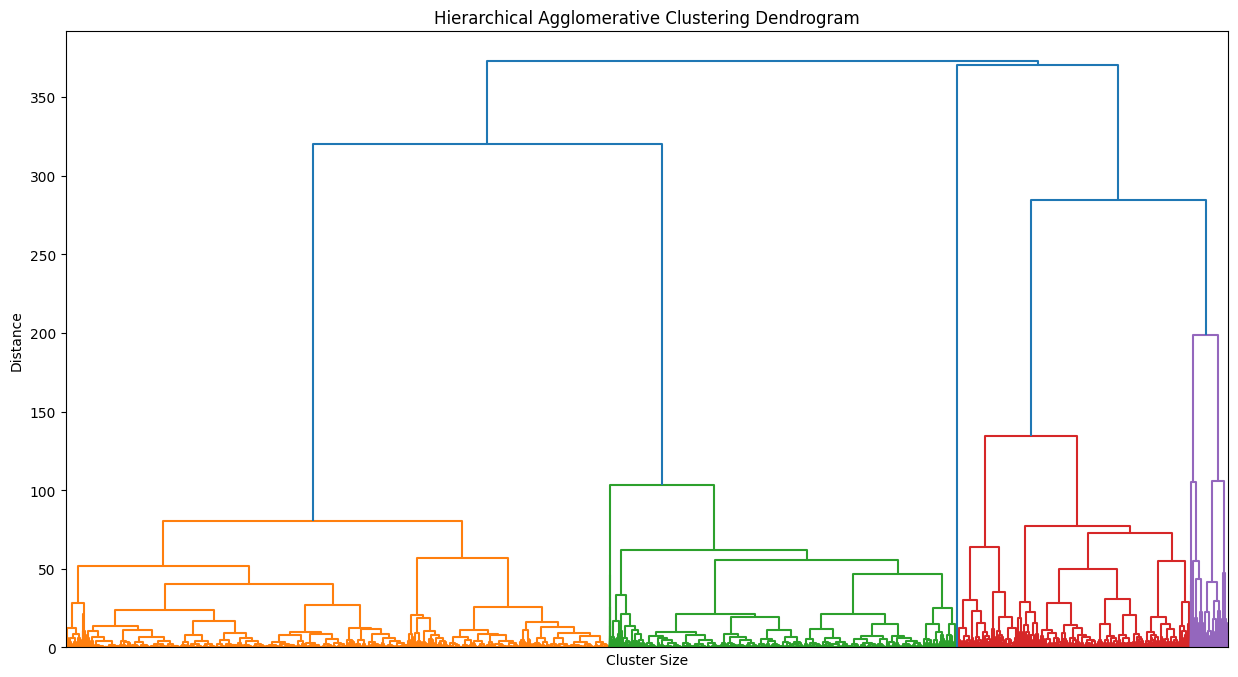

In [35]:
# Perform hierarchical agglomerative clustering
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# Plot the dendrogram to choose the optimal number of clusters
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=90., show_leaf_counts=False, no_labels=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [36]:
# Based on the dendrogram, choose an optimal number of clusters
optimal_clusters = 6  # Adjust this based on the dendrogram

In [37]:
# Perform hierarchical agglomerative clustering with the chosen number of clusters
hac = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
df['cluster'] = hac.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.5687251118026685


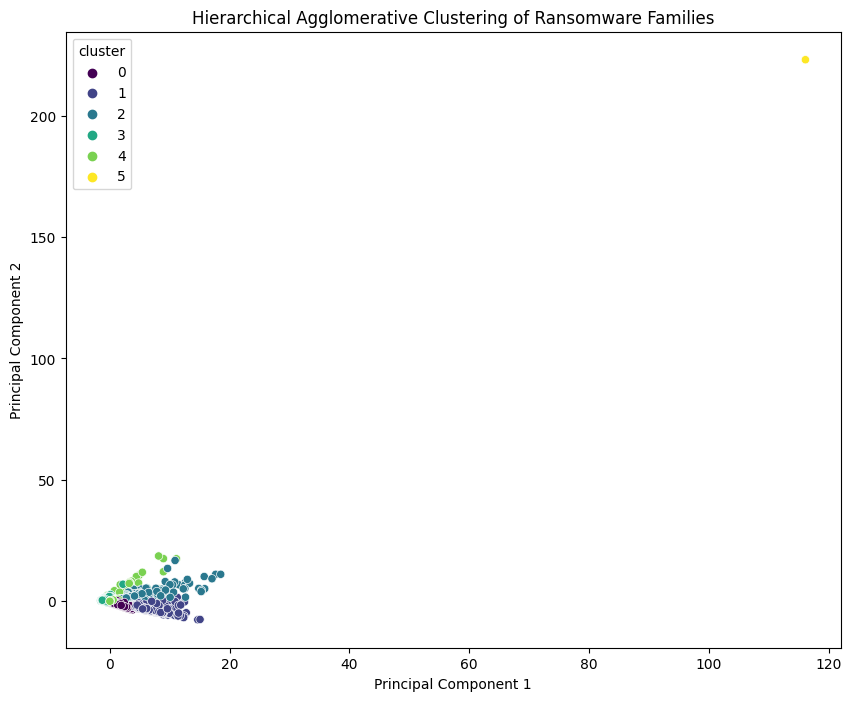

In [41]:
# Visualize the clusters in 2D using the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Hierarchical Agglomerative Clustering of Ransomware Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

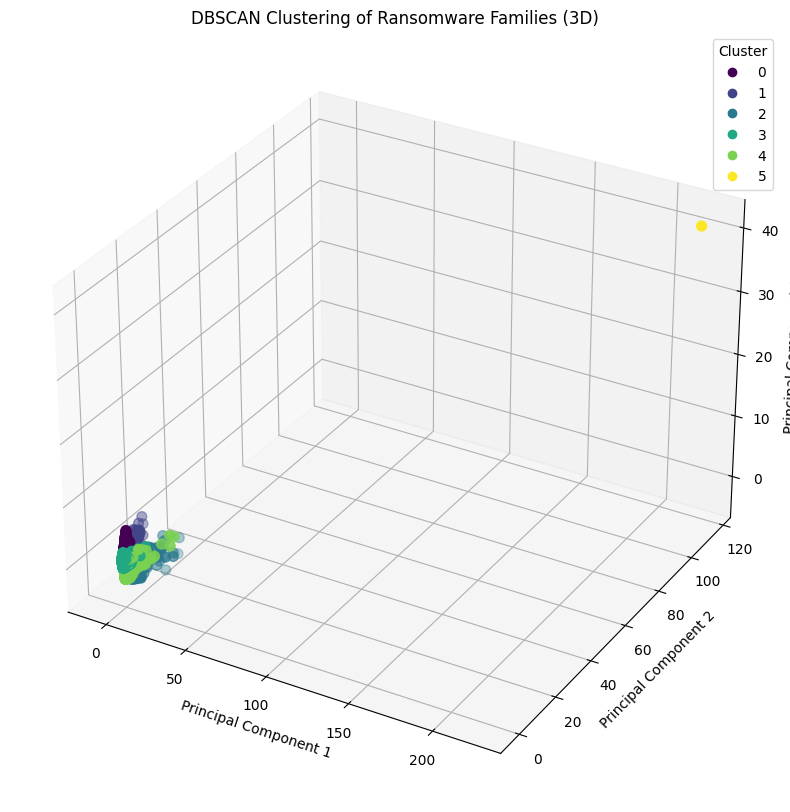

In [49]:
# Visualize the clusters in 3D using the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 1], X_pca[:, 0], X_pca[:, 2], c=df['cluster'], cmap='viridis', s=50)
ax.set_title('DBSCAN Clustering of Ransomware Families (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
plt.show()

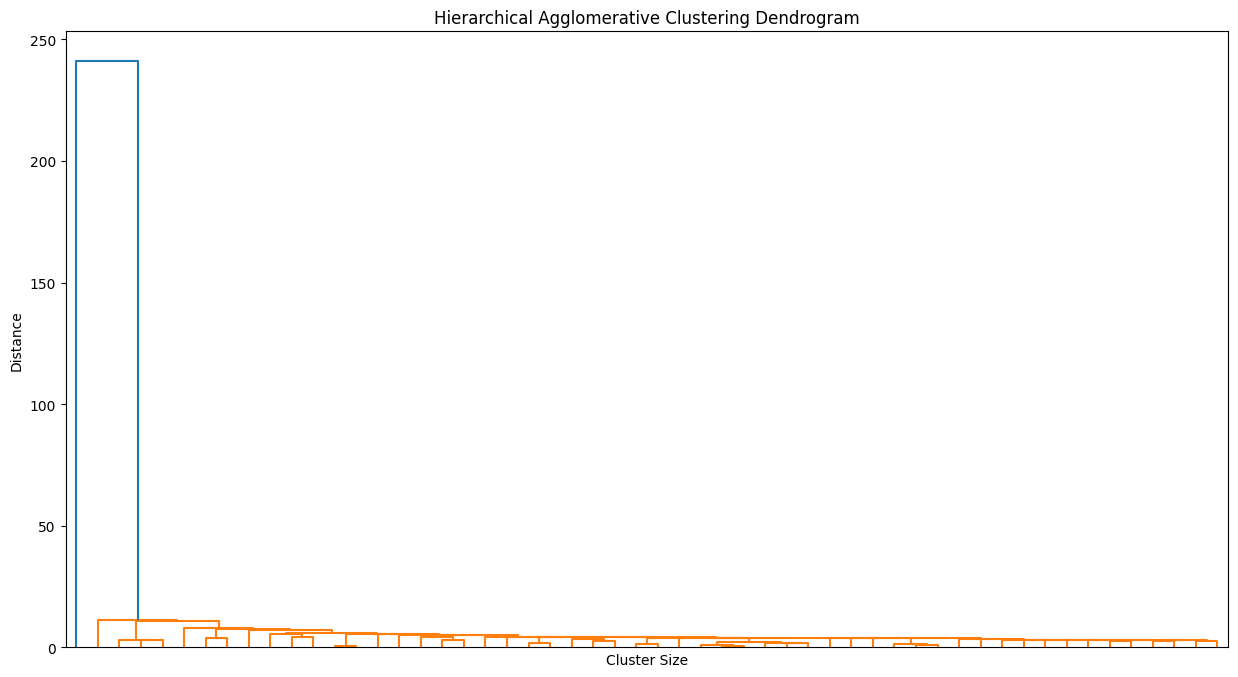

In [50]:
# Perform hierarchical agglomerative clustering using single linkage
linkage_matrix = linkage(X_scaled, method='single', metric='euclidean')

# Plot the dendrogram to choose the optimal number of clusters
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=90., show_leaf_counts=False, no_labels=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [51]:
# Based on the dendrogram, choose an optimal number of clusters
optimal_clusters = 2  # Adjust this based on the dendrogram

In [52]:
# Perform hierarchical agglomerative clustering with the chosen number of clusters(single linkage)
hac = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='single')
df['cluster'] = hac.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [53]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.989160871986358


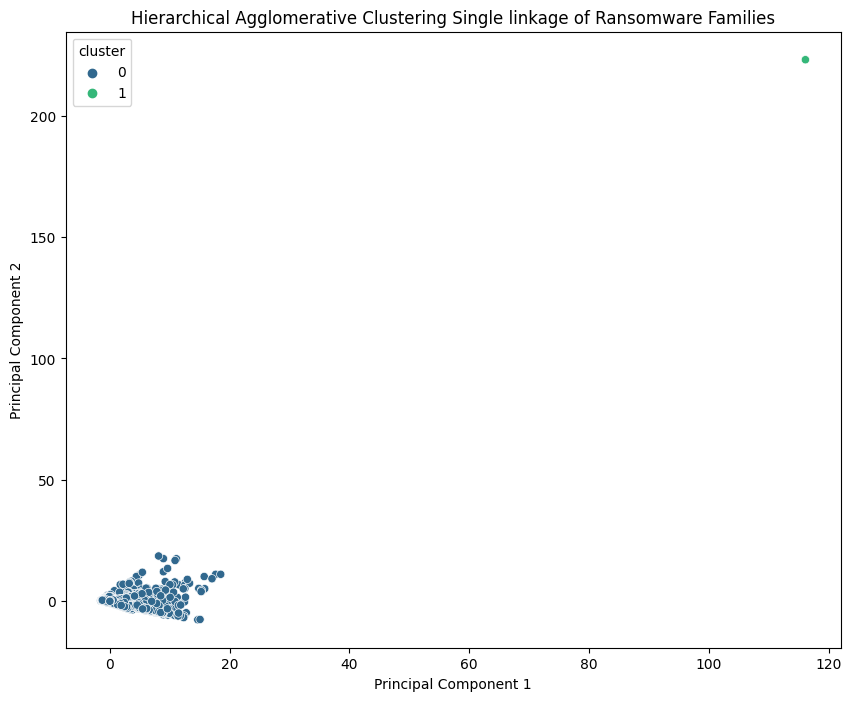

In [56]:
# Visualize the clusters in 2D using the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Hierarchical Agglomerative Clustering Single linkage of Ransomware Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

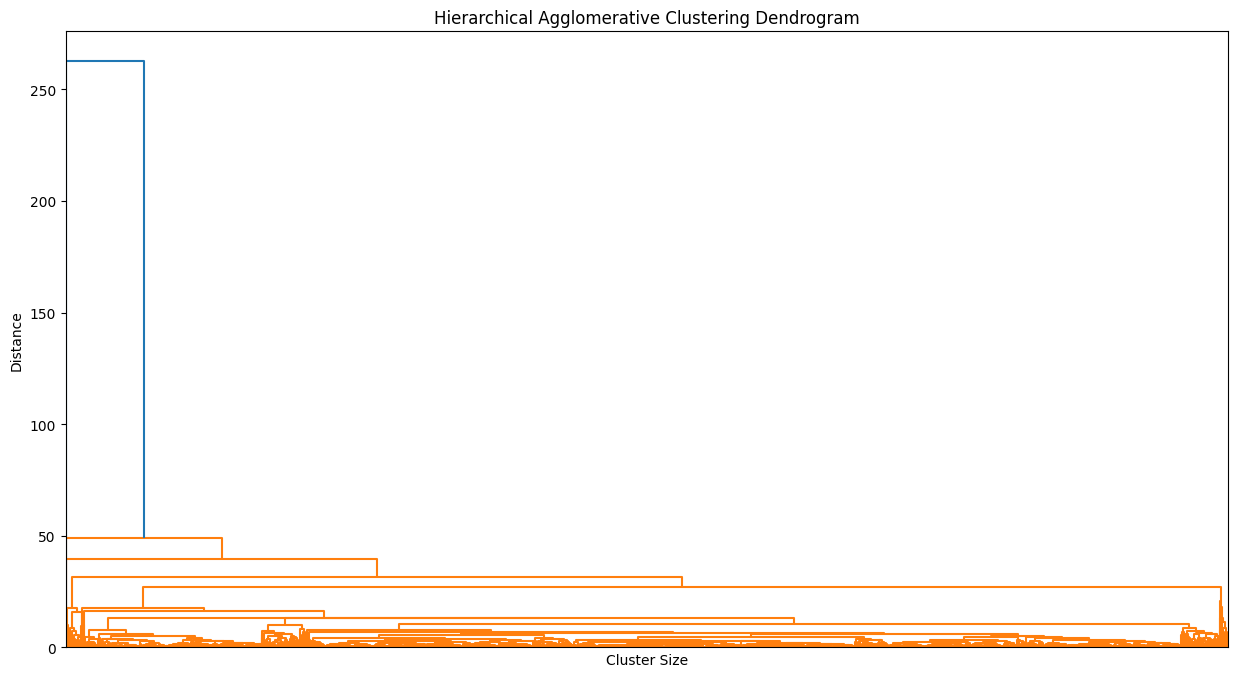

In [57]:
# Perform hierarchical agglomerative clustering using complete linkage
linkage_matrix = linkage(X_scaled, method='complete', metric='euclidean')

# Plot the dendrogram to choose the optimal number of clusters
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=90., show_leaf_counts=False, no_labels=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [58]:
# Based on the dendrogram, choose an optimal number of clusters
optimal_clusters = 2  # Adjust this based on the dendrogram

# Perform hierarchical agglomerative clustering with the chosen number of clusters(complete linkage)
hac = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='single')
df['cluster'] = hac.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [59]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.989160871986358


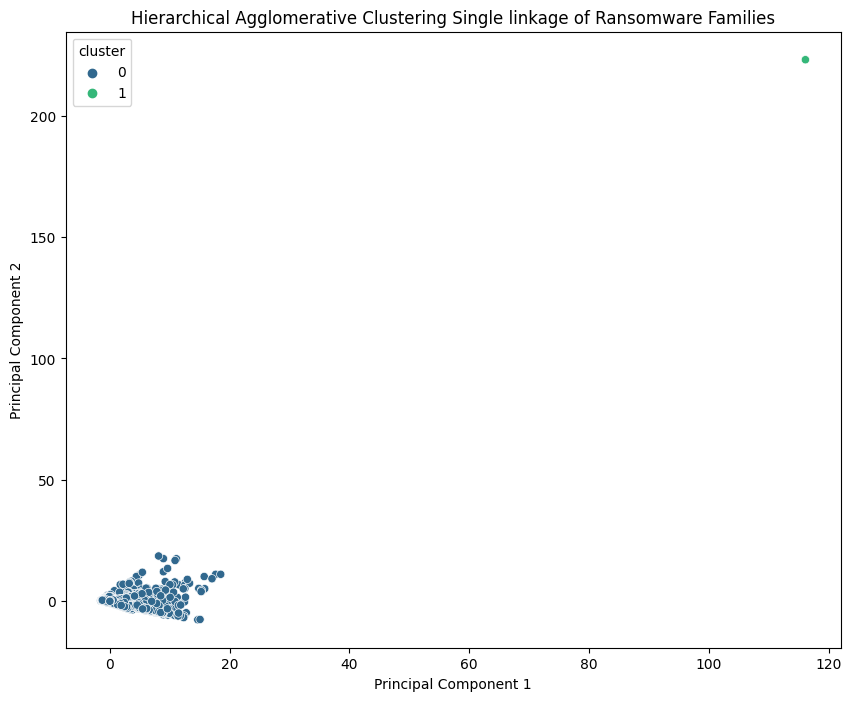

In [60]:
# Visualize the clusters in 2D using the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Hierarchical Agglomerative Clustering Single linkage of Ransomware Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [61]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=50)  # Adjust parameters as needed
df['cluster'] = dbscan.fit_predict(X_scaled)

In [62]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.4999597980505112


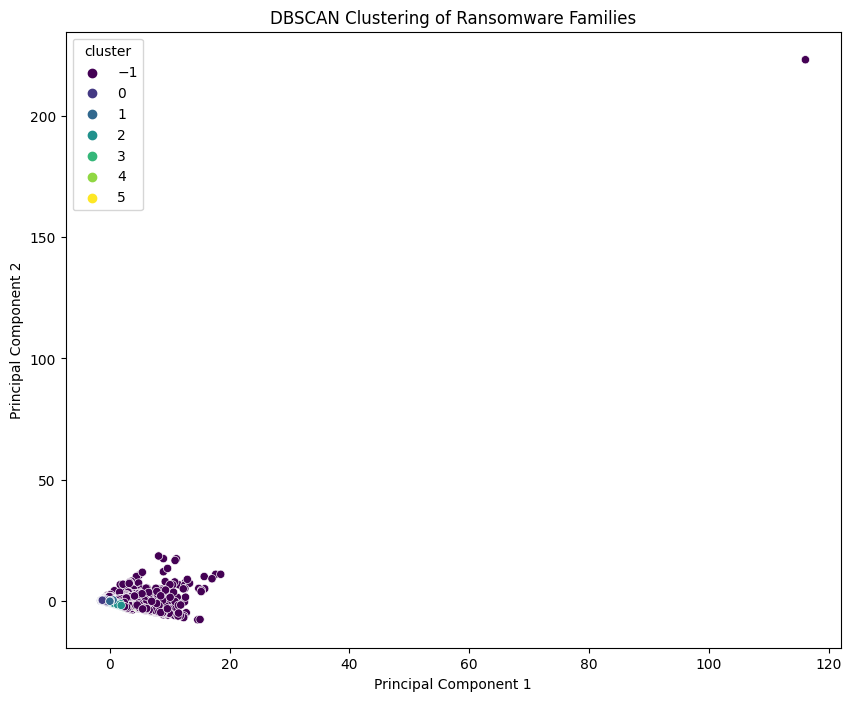

In [63]:
# Visualize the clusters in 2D using the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering of Ransomware Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [64]:
param_grid = { 
    'eps': [0.1, 0.5, 1.0],  # epsilon
    'min_samples': [30, 50, 100]  # minimum number of samples
}

In [65]:
def custom_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels) if len(set(labels)) > 1 else 0.0

In [66]:
# Perform grid search with silhouette score as the scoring metric
grid_search = GridSearchCV(estimator=DBSCAN(), param_grid=param_grid, scoring= custom_silhouette_score, cv=3, n_jobs=-1)
grid_search.fit(X_scaled)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=DBSCAN(), n_jobs=-1,
             param_grid={'eps': [0.1, 0.5, 1.0], 'min_samples': [30, 50, 100]},
             scoring=<function custom_silhouette_score at 0x789857e92b00>)

In [67]:
# Get the best parameters
best_params = grid_search.best_params_

In [68]:
# Re-run DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['cluster'] = best_dbscan.fit_predict(X_scaled)

In [69]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.5846488449595236


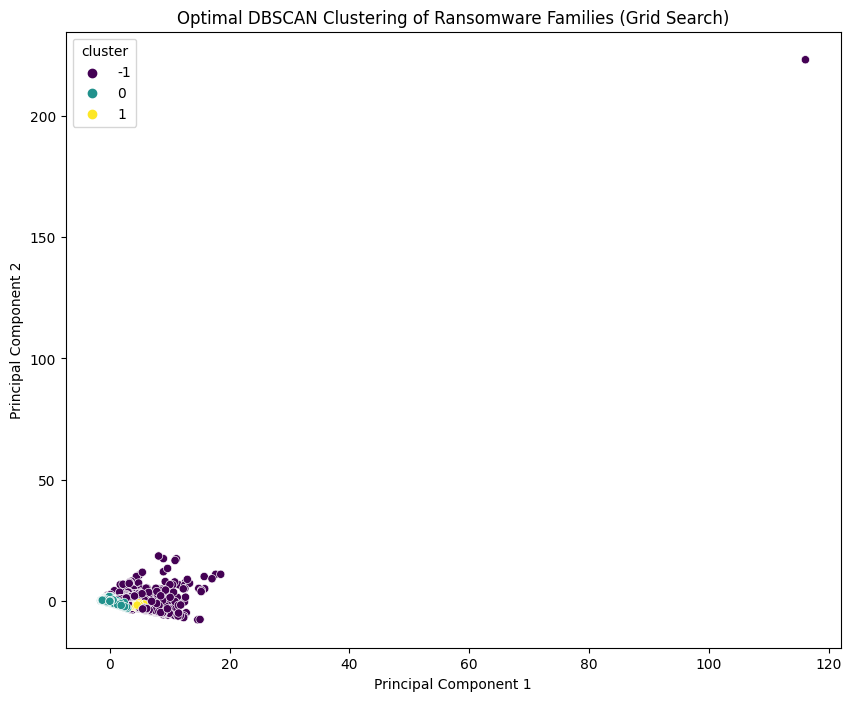

Best Hyperparameters: {'eps': 1.0, 'min_samples': 50}


In [72]:
# Visualize the clusters in 2D using the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Optimal DBSCAN Clustering of Ransomware Families (Grid Search)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

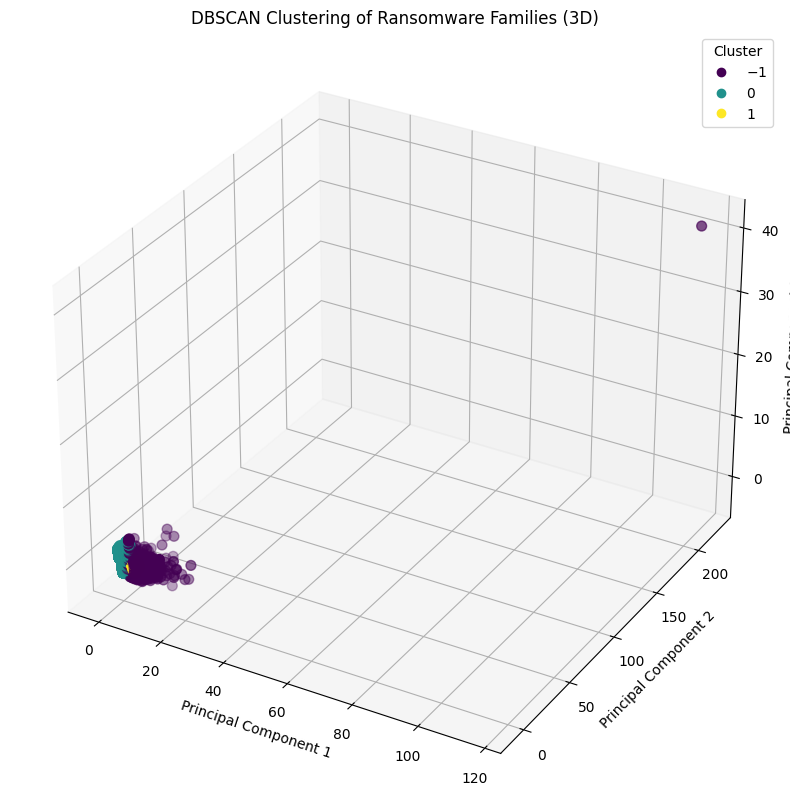

In [81]:
# Visualize the clusters in 3D using the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['cluster'], cmap='viridis', s=50)
ax.set_title('DBSCAN Clustering of Ransomware Families (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
plt.show()